In [1]:
#STEP 1.1-LOADING OF DATASET

import pandas as pd

df_train = pd.read_csv(r"C:\Users\Preetika\OneDrive\Desktop\fraudTrain.csv.zip")
df_test  = pd.read_csv(r"C:\Users\Preetika\OneDrive\Desktop\fraudTest.csv.zip")

print("Train shape:", df_train.shape)
print("Test shape :", df_test.shape)

df_train.head()


Train shape: (1296675, 23)
Test shape : (555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [3]:
#STEP 1.2 — Convert CSV → Parquet chunks (before cleaning)

import pandas as pd

df_train = pd.read_csv(r"C:\Users\Preetika\OneDrive\Desktop\fraudTrain.csv.zip")
df_train.to_parquet("data/train.parquet", index=False)

df_test = pd.read_csv(r"C:\Users\Preetika\OneDrive\Desktop\fraudTest.csv.zip")
df_test.to_parquet("data/test.parquet", index=False)

print("Saved train.parquet and test.parquet")


Saved train.parquet and test.parquet


In [4]:
#STEP 1.3-CLEANING OF DATA

import pandas as pd

# load tiny preview / first parquet part OR CSV
df = pd.read_parquet("data/train.parquet")

# 1. remove the extra index column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# 2. convert transaction time to datetime
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], errors="coerce")

# 3. remove duplicate rows if any
df = df.drop_duplicates()

print("Cleaned shape:", df.shape)
df.head()


Cleaned shape: (1296675, 22)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
#STEP 1.4-CREATED BASIC TIME FEATURES
#train-dataset

df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year
df['dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
df['is_weekend'] = (df['dayofweek'] >= 5).astype('int8')

print("Time features created!")
print(df[['hour','day','month','year','dayofweek','is_weekend']].head())


Time features created!
   hour  day  month  year  dayofweek  is_weekend
0     0    1      1  2019          1           0
1     0    1      1  2019          1           0
2     0    1      1  2019          1           0
3     0    1      1  2019          1           0
4     0    1      1  2019          1           0


In [6]:
#STEP 1.5-Convert dob to real date + create age
# Convert date of birth to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Calculate age at time of transaction
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

print("DOB converted & age created!")
print(df[['dob', 'age']].head())
print("Any null ages:", df['age'].isna().sum())


DOB converted & age created!
         dob  age
0 1988-03-09   30
1 1978-06-21   40
2 1962-01-19   56
3 1967-01-12   52
4 1986-03-28   32
Any null ages: 0


In [7]:
#STEP 1.6-Convert categorical text columns into category dtype (massive memory + speed improvement)

cat_cols = ['merchant','category','gender','state','job','city','first','last']

for col in cat_cols:
    df[col] = df[col].astype('category')

print("Categorical columns converted!")
df[cat_cols].dtypes


Categorical columns converted!


merchant    category
category    category
gender      category
state       category
job         category
city        category
first       category
last        category
dtype: object

In [8]:
# STEP 1.7 — Numeric downcasting (one tiny action)
import numpy as np

def mem_usage_mb(df):
    return round(df.memory_usage(deep=True).sum() / 1024**2, 2)

print("Memory before (MB):", mem_usage_mb(df))

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric columns detected:", num_cols)

for c in num_cols:
    if pd.api.types.is_integer_dtype(df[c]):
        df[c] = pd.to_numeric(df[c], downcast='integer')
    else:
        df[c] = pd.to_numeric(df[c], downcast='float')

print("Downcast complete.")
print("New dtypes:")
print(df[num_cols].dtypes)
print("Memory after (MB):", mem_usage_mb(df))


Memory before (MB): 359.17
Numeric columns detected: ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age']
Downcast complete.
New dtypes:
cc_num          int64
amt           float64
zip             int32
lat           float32
long          float32
city_pop        int32
unix_time       int32
merch_lat     float32
merch_long    float32
is_fraud         int8
age              int8
dtype: object
Memory after (MB): 307.23


In [9]:
#Step 1.8 — Drop columns that are useless / identity-leaking

df = df.drop(columns=['first', 'last'])
print("Dropped first + last. New shape:", df.shape)


Dropped first + last. New shape: (1296675, 27)


In [ ]:
#STEP - 2 SQL ETL + FEATURE VIEW CREATION

In [10]:
#STEP - 2.1 Create a SQLite database + connect to it

from sqlalchemy import create_engine

engine = create_engine("sqlite:///fraud_project.db")

print("SQLite database created & connected!")


SQLite database created & connected!


In [11]:
# STEP 2.2 — Save cleaned chunk to SQLite 
table_name = "transaction_train"

# Create/replace empty table using the df schema
df.head(0).to_sql(table_name, con=engine, if_exists='replace', index=False)

# Insert in small batches (safe for SQLite)
batch_size = 500
total = len(df)

for i in range(0, total, batch_size):
    df.iloc[i:i+batch_size].to_sql(
        table_name,
        con=engine,
        if_exists='append',
        index=False
    )

print(f"Inserted {total} rows into SQLite table '{table_name}'.")



Inserted 1296675 rows into SQLite table 'transaction_train'.


In [12]:
#STEP 2.3 — Create a SQL "Feature View

# STEP 2.3.1 — Show all columns from SQLite table

from sqlalchemy import text

with engine.connect() as conn:
    info = conn.execute(text("PRAGMA table_info(transaction_train);")).fetchall()

# Print only column names in a clean list
cols = [row[1] for row in info]
print("Columns in table:", cols)


Columns in table: ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day', 'month', 'year', 'dayofweek', 'is_weekend', 'age']


In [13]:
# STEP 2.3.2 — Create model_features table (clean + minimal)
from sqlalchemy import text

# Create feature view
with engine.begin() as conn:
    conn.execute(text("DROP TABLE IF EXISTS model_features"))
    conn.execute(text("""
        CREATE TABLE model_features AS
        SELECT
            amt,
            category,
            merchant,
            gender,
            state,
            city_pop,
            age,
            unix_time,
            hour,
            day,
            month,
            is_weekend,
            lat,
            long,
            merch_lat,
            merch_long,
            is_fraud
        FROM transaction_train
    """))

# Verify creation
with engine.connect() as conn:
    cols = conn.execute(text("PRAGMA table_info(model_features);")).fetchall()
    cnt = conn.execute(text("SELECT COUNT(*) FROM model_features;")).fetchone()[0]

# Print clean output
col_names = [c[1] for c in cols]
print("model_features created.")
print("Rows:", cnt)
print("Columns:", col_names)


model_features created.
Rows: 1296675
Columns: ['amt', 'category', 'merchant', 'gender', 'state', 'city_pop', 'age', 'unix_time', 'hour', 'day', 'month', 'is_weekend', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']


In [14]:
# STEP 2.3.3 — Add useful indexes + check class balance (clean version)
from sqlalchemy import text

# Create indexes to speed up SQL queries
with engine.begin() as conn:
    conn.execute(text("CREATE INDEX IF NOT EXISTS idx_mf_unix_time ON model_features(unix_time);"))
    conn.execute(text("CREATE INDEX IF NOT EXISTS idx_mf_category ON model_features(category);"))
    conn.execute(text("CREATE INDEX IF NOT EXISTS idx_mf_is_fraud ON model_features(is_fraud);"))
    conn.execute(text("CREATE INDEX IF NOT EXISTS idx_mf_hour ON model_features(hour);"))

# Class balance check
with engine.connect() as conn:
    rows  = conn.execute(text("SELECT is_fraud, COUNT(*) FROM model_features GROUP BY is_fraud ORDER BY is_fraud;")).fetchall()
    total = conn.execute(text("SELECT COUNT(*) FROM model_features;")).fetchone()[0]

print("Indexes created.")
print("Total rows:", total)
print("Class distribution:")

for label, count in rows:
    pct = count / total * 100
    print(f"{label}: {count} rows ({pct:.3f}%)")


Indexes created.
Total rows: 1296675
Class distribution:
0: 1289169 rows (99.421%)
1: 7506 rows (0.579%)


In [15]:
# STEP 2.3.4 — Export model_features table to Parquet
import pandas as pd
from sqlalchemy import text

df_features = pd.read_sql(text("SELECT * FROM model_features"), con=engine)
df_features.to_parquet("model_features.parquet", index=False)

print("Saved model_features.parquet")
print("Rows:", len(df_features))


Saved model_features.parquet
Rows: 1296675


In [ ]:
#STEP - 3 Python EDA + Feature Engineering

In [16]:
# Step 3.1 — Basic EDA summary on model_features.parquet

import pandas as pd

# Load data
df = pd.read_parquet("model_features.parquet")
print("Rows & Columns:", df.shape)

# Quick look
print("\nColumns:")
print(df.columns.tolist())

# Missing values
print("\nMissing % (top columns):")
print((df.isna().mean().sort_values(ascending=False) * 100).head(10))

# Target balance (fraud vs non-fraud)
print("\nTarget distribution (is_fraud):")
print(df["is_fraud"].value_counts())

print("\nTarget %:")
print((df["is_fraud"].value_counts(normalize=True) * 100).round(4))

# Transaction amount stats
print("\nAmount (amt) stats:")
print(df["amt"].describe())

# Top merchants
print("\nTop merchants:")
print(df["merchant"].value_counts().head(10))

# Top categories
print("\nTop categories:")
print(df["category"].value_counts().head(10))

# Fraud rate by category (simple)
print("\nFraud rate by category (top categories):")
cat_rates = df.groupby("category")["is_fraud"].mean().sort_values(ascending=False) * 100
print(cat_rates.head(10).round(3))

# Simple numeric correlations with target
print("\nCorrelation with is_fraud:")
num_cols = ["amt", "age", "city_pop", "hour"]
print(df[num_cols + ["is_fraud"]].corr()["is_fraud"].round(3))




Rows & Columns: (1296675, 17)

Columns:
['amt', 'category', 'merchant', 'gender', 'state', 'city_pop', 'age', 'unix_time', 'hour', 'day', 'month', 'is_weekend', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']

Missing % (top columns):
amt           0.0
day           0.0
merch_long    0.0
merch_lat     0.0
long          0.0
lat           0.0
is_weekend    0.0
month         0.0
hour          0.0
category      0.0
dtype: float64

Target distribution (is_fraud):
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Target %:
is_fraud
0    99.4211
1     0.5789
Name: proportion, dtype: float64

Amount (amt) stats:
count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

Top merchants:
merchant
fraud_Kilback LLC                   4403
fraud_Cormier LLC                   3649
fraud_Schumm PLC                    3634
fraud_Kuhn LLC      

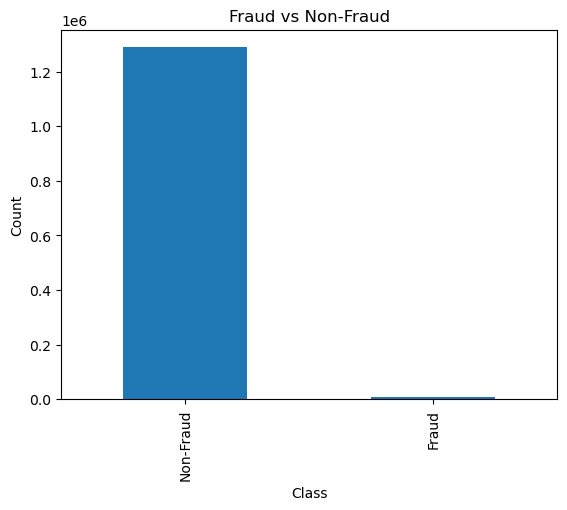

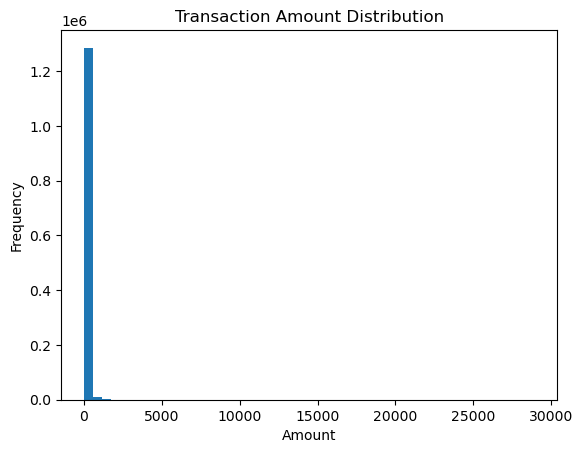

In [17]:
# Step 3.2 — Visual EDA
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("model_features.parquet")

# 1. Fraud vs Non-Fraud (simple bar chart)
df["is_fraud"].value_counts().plot(kind="bar")
plt.title("Fraud vs Non-Fraud")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()

# 2. Transaction Amount Distribution
df["amt"].plot(kind="hist", bins=50)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()


In [18]:
# Step 3.3 — Feature Engineering
import pandas as pd
import numpy as np

df = pd.read_parquet("model_features.parquet")

# Log transform for amount (helps with large values)
df["amt_log"] = np.log1p(df["amt"])

df[["amt", "amt_log"]].head()



,amt,amt_log
0,4.97,1.786747
1,107.23,4.684259
2,220.11,5.398660
3,45.00,3.828641
4,41.96,3.760269


In [19]:
# Create time_of_day from hour
def get_time_of_day(h):
    if h < 6:
        return "Night"
    elif h < 12:
        return "Morning"
    elif h < 18:
        return "Afternoon"
    else:
        return "Evening"

df["time_of_day"] = df["hour"].apply(get_time_of_day)

df[["hour", "time_of_day"]].head()



,hour,time_of_day
0,0,Night
1,0,Night
2,0,Night
3,0,Night
4,0,Night


In [20]:
# Distance between customer and merchant (Haversine formula)
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 6371 * 2 * np.arcsin(np.sqrt(a))  # distance in km

df["distance_km"] = haversine(df["lat"], df["long"], df["merch_lat"], df["merch_long"])

df[["lat", "long", "merch_lat", "merch_long", "distance_km"]].head()


,lat,long,merch_lat,merch_long,distance_km
0,36.078800,-81.178101,36.011292,-82.048317,78.597710
1,48.887798,-118.210503,49.159046,-118.186462,30.212281
2,42.180801,-112.262001,43.150703,-112.154480,108.205879
3,46.230598,-112.113800,47.034332,-112.561073,95.673586
4,38.420700,-79.462898,38.674999,-78.632462,77.556402


In [21]:
# Step 3.4 — Final ML feature set
final_cols = [
    "amt", "amt_log", "age", "city_pop", "unix_time", "distance_km",
    "category", "merchant", "gender", "state", "time_of_day",
    "is_fraud"
]

df_final = df[final_cols].copy()

df_final.head()
df_final.shape


(1296675, 12)

In [22]:
# PROCESS FULL DATASET IN CHUNKS (clean, minimal, robust)
import pandas as pd
import numpy as np
from pathlib import Path

# -------- SETTINGS (update CSV_PATH to your file) --------
CSV_PATH = r"C:\Users\Preetika\OneDrive\Desktop\fraudTrain.csv.zip"  # <- change if needed
CHUNKSIZE = 200_000
CLEANED_FOLDER = Path("data/parquet/cleaned")
CLEANED_FOLDER.mkdir(parents=True, exist_ok=True)
FINAL_PARQUET = "data/parquet/train_clean_full.parquet"
PARQUET_ENGINE = "pyarrow"

# -------- HELPERS --------
def get_time_of_day(hour):
    if pd.isna(hour):
        return "Unknown"
    h = int(hour)
    if h < 6:
        return "Night"
    if h < 12:
        return "Morning"
    if h < 18:
        return "Afternoon"
    return "Evening"

def optimize_dtypes_chunk(df):
    """Downcast numeric columns and convert low-cardinality object cols to category."""
    nrows = len(df)
    for c in df.columns:
        col = df[c]
        if pd.api.types.is_integer_dtype(col) or pd.api.types.is_float_dtype(col):
            # downcast numeric types safely
            df[c] = pd.to_numeric(col, downcast="integer" if pd.api.types.is_integer_dtype(col) else "float")
        elif col.dtype == "object":
            nunique = col.nunique(dropna=True)
            if nunique / max(1, nrows) <= 0.05:
                df[c] = col.astype("category")
    return df

def haversine_series(lat1, lon1, lat2, lon2):
    """Vectorized Haversine: returns km (floats)."""
    # convert to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371.0 * c  # km

# -------- PROCESSING LOOP --------
reader = pd.read_csv(CSV_PATH, chunksize=CHUNKSIZE, low_memory=True)

for idx, chunk in enumerate(reader):
    out_path = CLEANED_FOLDER / f"train_clean_{idx:02d}.parquet"

    if out_path.exists():
        print(f"Skipping chunk {idx:02d} (exists)")
        continue

    print(f"\nProcessing chunk {idx:02d} - rows:", len(chunk))

    # Drop index column if present
    if "Unnamed: 0" in chunk.columns:
        chunk = chunk.drop(columns=["Unnamed: 0"])

    # Parse datetimes
    chunk["trans_date_trans_time"] = pd.to_datetime(chunk["trans_date_trans_time"], errors="coerce")
    chunk["dob"] = pd.to_datetime(chunk["dob"], errors="coerce")

    # Age
    chunk["age"] = (chunk["trans_date_trans_time"] - chunk["dob"]).dt.days // 365

    # amt_log
    chunk["amt_log"] = np.log1p(chunk["amt"])

    # Extract time parts
    chunk["hour"] = chunk["trans_date_trans_time"].dt.hour
    chunk["day"] = chunk["trans_date_trans_time"].dt.day
    chunk["month"] = chunk["trans_date_trans_time"].dt.month
    chunk["is_weekend"] = chunk["trans_date_trans_time"].dt.dayofweek >= 5

    # time_of_day
    chunk["time_of_day"] = chunk["hour"].apply(get_time_of_day)

    # Distance (Haversine) - handle missing coords safely
    chunk["distance_km"] = haversine_series(
        chunk["lat"].fillna(0.0).astype(float),
        chunk["long"].fillna(0.0).astype(float),
        chunk["merch_lat"].fillna(0.0).astype(float),
        chunk["merch_long"].fillna(0.0).astype(float),
    )

    # Drop identifying fields if present
    for col in ["first", "last"]:
        if col in chunk.columns:
            chunk = chunk.drop(columns=[col])

    # Optimize memory
    chunk = optimize_dtypes_chunk(chunk)

    # Final schema columns to keep (same order each chunk)
    final_cols = [
        "amt","amt_log","age","city_pop","unix_time","distance_km",
        "category","merchant","gender","state","time_of_day","is_fraud",
        "lat","long","merch_lat","merch_long",
        "trans_date_trans_time","hour","day","month","is_weekend"
    ]

    # Ensure final columns exist
    for col in final_cols:
        if col not in chunk.columns:
            chunk[col] = np.nan

    # Save cleaned chunk
    chunk[final_cols].to_parquet(out_path, index=False, engine=PARQUET_ENGINE)
    print(f"Saved cleaned chunk {idx:02d} -> {out_path}")

# -------- COMBINE ALL CLEANED CHUNKS --------
clean_files = sorted(CLEANED_FOLDER.glob("train_clean_*.parquet"))
print("\nCombining", len(clean_files), "cleaned chunks into", FINAL_PARQUET)

dfs = []
for p in clean_files:
    print("Loading:", p)
    dfs.append(pd.read_parquet(p, engine=PARQUET_ENGINE))

full = pd.concat(dfs, ignore_index=True)
full.to_parquet(FINAL_PARQUET, index=False, engine=PARQUET_ENGINE)

print("\nDONE! Combined rows:", len(full))



        


 





Skipping chunk 00 (exists)
Skipping chunk 01 (exists)
Skipping chunk 02 (exists)
Skipping chunk 03 (exists)
Skipping chunk 04 (exists)
Skipping chunk 05 (exists)
Skipping chunk 06 (exists)

Combining 7 cleaned chunks into data/parquet/train_clean_full.parquet
Loading: data\parquet\cleaned\train_clean_00.parquet
Loading: data\parquet\cleaned\train_clean_01.parquet
Loading: data\parquet\cleaned\train_clean_02.parquet
Loading: data\parquet\cleaned\train_clean_03.parquet
Loading: data\parquet\cleaned\train_clean_04.parquet
Loading: data\parquet\cleaned\train_clean_05.parquet
Loading: data\parquet\cleaned\train_clean_06.parquet

DONE! Combined rows: 1296675


In [23]:
# Step 4.1 - Load cleaned data
import pandas as pd

df = pd.read_parquet("data/parquet/train_clean_full.parquet")
print(df.shape)
df.head()


(1296675, 21)


,amt,amt_log,age,city_pop,unix_time,distance_km,category,merchant,gender,state,...,is_fraud,lat,long,merch_lat,merch_long,trans_date_trans_time,hour,day,month,is_weekend
0,4.970000,1.786747,30,3495,1325376018,78.597565,misc_net,"fraud_Rippin, Kub and Mann",F,NC,...,0,36.078800,-81.178101,36.011292,-82.048317,2019-01-01 00:00:18,0,1,1,False
1,107.230003,4.684258,40,149,1325376044,30.212175,grocery_pos,"fraud_Heller, Gutmann and Zieme",F,WA,...,0,48.887798,-118.210503,49.159046,-118.186462,2019-01-01 00:00:44,0,1,1,False
2,220.110001,5.398660,56,4154,1325376051,108.206085,entertainment,fraud_Lind-Buckridge,M,ID,...,0,42.180801,-112.262001,43.150703,-112.154480,2019-01-01 00:00:51,0,1,1,False
3,45.000000,3.828641,52,1939,1325376076,95.673233,gas_transport,"fraud_Kutch, Hermiston and Farrell",M,MT,...,0,46.230598,-112.113800,47.034332,-112.561073,2019-01-01 00:01:16,0,1,1,False
4,41.959999,3.760269,32,99,1325376186,77.556747,misc_pos,fraud_Keeling-Crist,M,VA,...,0,38.420700,-79.462898,38.674999,-78.632462,2019-01-01 00:03:06,0,1,1,False


In [24]:
# Step 4.2 - Select final feature columns
final_cols = [
    "amt","age","city_pop","unix_time","distance_km","amt_log",
    "category","merchant","gender","state","time_of_day","is_fraud"
]

df_final = df[final_cols].copy()

print(df_final.shape)
df_final.head(3)



(1296675, 12)


,amt,age,city_pop,unix_time,distance_km,amt_log,category,merchant,gender,state,time_of_day,is_fraud
0,4.970000,30,3495,1325376018,78.597565,1.786747,misc_net,"fraud_Rippin, Kub and Mann",F,NC,Night,0
1,107.230003,40,149,1325376044,30.212175,4.684258,grocery_pos,"fraud_Heller, Gutmann and Zieme",F,WA,Night,0
2,220.110001,56,4154,1325376051,108.206085,5.398660,entertainment,fraud_Lind-Buckridge,M,ID,Night,0


In [25]:
# Step 4.3 - Train/Test Split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df_final,
    test_size=0.2,
    random_state=42,
    stratify=df_final["is_fraud"]
)

print(train_df.shape, test_df.shape)
print(train_df["is_fraud"].mean()*100, "%")
print(test_df["is_fraud"].mean()*100, "%")


(1037340, 12) (259335, 12)
0.578884454470087 %
0.5787880540613491 %


In [26]:
# Step 4.4 - Frequency Encoding (robust)
freq_cols = ["merchant", "category"]

for col in freq_cols:
    freq = train_df[col].value_counts(normalize=True)
    train_mapped = train_df[col].map(freq).astype(float).fillna(0.0)
    test_mapped  = test_df[col].map(freq).astype(float).fillna(0.0)

    train_df[col + "_f"] = train_mapped
    test_df[col + "_f"]  = test_mapped

train_df[[c + "_f" for c in freq_cols]].head()



,merchant_f,category_f
509059,0.000696,0.035038
395295,0.001402,0.072639
536531,0.001768,0.089956
271001,0.001326,0.066201
532788,0.001411,0.072639


In [27]:
# Step 4.5 - Label Encoding (simple version)
from sklearn.preprocessing import LabelEncoder

label_cols = ["gender", "state", "time_of_day"]

for col in label_cols:
    le = LabelEncoder()
    
    train_df[col] = train_df[col].astype(str)
    test_df[col]  = test_df[col].astype(str)

    le.fit(train_df[col])
    
    train_df[col + "_l"] = le.transform(train_df[col])
    
    # handle unseen values in test
    test_df[col + "_l"] = test_df[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


In [28]:
# Step 4.6 - Scale numeric features
from sklearn.preprocessing import StandardScaler
import joblib

numeric_feats = ["amt","amt_log","age","city_pop","unix_time","distance_km"]
freq_feats = ["merchant_f","category_f"]
label_feats = ["gender_l","state_l","time_of_day_l"]

X_train = train_df[numeric_feats + freq_feats + label_feats].copy()
X_test  = test_df[numeric_feats + freq_feats + label_feats].copy()

y_train = train_df["is_fraud"].astype(int)
y_test  = test_df["is_fraud"].astype(int)

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats]  = scaler.transform(X_test[numeric_feats])

train_scaled = X_train.copy()
train_scaled["is_fraud"] = y_train

test_scaled = X_test.copy()
test_scaled["is_fraud"] = y_test

train_scaled.to_parquet("train_scaled.parquet", index=False)
test_scaled.to_parquet("test_scaled.parquet", index=False)
joblib.dump(scaler, "scaler.joblib")

print(train_scaled.shape, test_scaled.shape)



(1037340, 12) (259335, 12)


In [29]:
# Step 4.7 - Train Logistic Regression (minimal)
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)
import joblib

train_scaled = pd.read_parquet("train_scaled.parquet")
test_scaled  = pd.read_parquet("test_scaled.parquet")

X_train = train_scaled.drop(columns=["is_fraud"])
y_train = train_scaled["is_fraud"].astype(int)
X_test  = test_scaled.drop(columns=["is_fraud"])
y_test  = test_scaled["is_fraud"].astype(int)

model = LogisticRegression(class_weight="balanced", max_iter=300, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
roc  = roc_auc_score(y_test, y_prob)
pr   = average_precision_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Precision:", round(prec, 4))
print("Recall   :", round(rec, 4))
print("F1       :", round(f1, 4))
print("ROC AUC  :", round(roc, 4))
print("PR AUC   :", round(pr, 4))
print("Confusion (tn, fp, fn, tp):", (tn, fp, fn, tp))

joblib.dump(model, "fraud_model_logistic.joblib")
print("Saved:", "fraud_model_logistic.joblib")


Precision: 0.0844
Recall   : 0.7522
F1       : 0.1517
ROC AUC  : 0.8944
PR AUC   : 0.2048
Confusion (tn, fp, fn, tp): (245584, 12250, 372, 1129)
Saved: fraud_model_logistic.joblib


In [30]:
# ensure train_df exists (required for frequency + label encoding)
if 'train_df' not in globals():
    train_df = pd.read_parquet("train_scaled.parquet")
    print("train_df loaded from train_scaled.parquet:", train_df.shape)


In [31]:
# Step 4.8 - Full prediction and save results (robust)
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# ensure train_df exists
if 'train_df' not in globals():
    train_df = pd.read_parquet("train_scaled.parquet")
    print("train_df loaded:", train_df.shape)

# load model + scaler
model = joblib.load("fraud_model_logistic.joblib")
scaler = joblib.load("scaler.joblib")

# load full cleaned data
df = pd.read_parquet("data/parquet/train_clean_full.parquet")

# frequency maps
merchant_freq = train_df["merchant"].value_counts(normalize=True)
category_freq = train_df["category"].value_counts(normalize=True)

df["merchant_f"] = df["merchant"].map(merchant_freq).astype(float).fillna(0.0)
df["category_f"] = df["category"].map(category_freq).astype(float).fillna(0.0)

# label maps (refit LabelEncoder on train_df)
label_cols = ["gender", "state", "time_of_day"]
label_maps = {}

for col in label_cols:
    le = LabelEncoder()
    le.fit(train_df[col].astype(str))
    label_maps[col] = {cls: idx for idx, cls in enumerate(le.classes_)}

df["gender_l"]      = df["gender"].astype(str).map(label_maps["gender"]).fillna(-1).astype(int)
df["state_l"]       = df["state"].astype(str).map(label_maps["state"]).fillna(-1).astype(int)
df["time_of_day_l"] = df["time_of_day"].astype(str).map(label_maps["time_of_day"]).fillna(-1).astype(int)

# final features
numeric_feats = ["amt","amt_log","age","city_pop","unix_time","distance_km"]
final_feats = numeric_feats + ["merchant_f","category_f","gender_l","state_l","time_of_day_l"]

# scale numeric features
df_scaled = df[final_feats].copy()
df_scaled[numeric_feats] = scaler.transform(df_scaled[numeric_feats])

# prediction + bucket
df["risk_score"] = model.predict_proba(df_scaled)[:, 1]
df["risk_bucket"] = df["risk_score"].apply(
    lambda s: "High" if s > 0.40 else ("Medium" if s > 0.15 else "Low")
)

# save output
out_cols = [
    "amt","category","merchant","state","gender","city_pop","age",
    "unix_time","distance_km","risk_score","risk_bucket","is_fraud"
]

df[out_cols].to_parquet("fraud_full_predictions.parquet", index=False)
df[out_cols].to_csv("fraud_full_predictions.csv", index=False)

print("Saved fraud_full_predictions.parquet and .csv — rows:", len(df))



Saved fraud_full_predictions.parquet and .csv — rows: 1296675


In [32]:
#STEP 5 — Chunk 1: Load full scored data
import pandas as pd
df = pd.read_parquet("fraud_full_predictions.parquet")
print("Rows:", len(df))
print(df.head())


Rows: 1296675
          amt       category                            merchant state gender  \
0    4.970000       misc_net          fraud_Rippin, Kub and Mann    NC      F   
1  107.230003    grocery_pos     fraud_Heller, Gutmann and Zieme    WA      F   
2  220.110001  entertainment                fraud_Lind-Buckridge    ID      M   
3   45.000000  gas_transport  fraud_Kutch, Hermiston and Farrell    MT      M   
4   41.959999       misc_pos                 fraud_Keeling-Crist    VA      M   

   city_pop  age   unix_time  distance_km  risk_score risk_bucket  is_fraud  
0      3495   30  1325376018    78.597565    0.424648        High         0  
1       149   40  1325376044    30.212175    0.499570        High         0  
2      4154   56  1325376051   108.206085    0.628710        High         0  
3      1939   52  1325376076    95.673233    0.408015        High         0  
4        99   32  1325376186    77.556747    0.324318      Medium         0  


In [33]:
#STEP 5 — Chunk 2: High / Medium / Low bucket counts

bucket_summary = df["risk_bucket"].value_counts()
print(bucket_summary)


risk_bucket
Medium    745206
Low       376036
High      175433
Name: count, dtype: int64


In [34]:
#STEP 5 — Chunk 3: Fraud counts and fraud rate per bucket
# fraud counts and fraud rate per bucket
bucket_counts = df.groupby("risk_bucket")["is_fraud"].agg(["count","sum"]).rename(columns={"sum":"fraud_count"})
bucket_counts["fraud_rate_pct"] = (bucket_counts["fraud_count"] / bucket_counts["count"] * 100).round(4)
print(bucket_counts)


              count  fraud_count  fraud_rate_pct
risk_bucket                                     
High         175433         6208          3.5387
Low          376036          361          0.0960
Medium       745206          937          0.1257


In [35]:
#STEP 5 — Chunk 4: Top merchants in High-risk bucket
top_merchants_high = (
    df[df["risk_bucket"] == "High"]["merchant"]
    .value_counts()
    .head(10)
)
print(top_merchants_high)


merchant
fraud_Bradtke PLC                   1195
fraud_Schumm, Bauch and Ondricka    1185
fraud_Rau and Sons                  1184
fraud_Bauch-Raynor                  1183
fraud_Doyle Ltd                     1183
fraud_Hackett-Lueilwitz             1181
fraud_Kilback LLC                   1180
fraud_Goodwin-Nitzsche              1179
fraud_Murray-Smitham                1178
fraud_Casper, Hand and Zulauf       1173
Name: count, dtype: int64


In [36]:
#STEP 5 — Chunk 5: Top categories in High-risk bucket

top_categories_high = (
    df[df["risk_bucket"] == "High"]["category"]
    .value_counts()
    .head(10)
)
print(top_categories_high)


category
grocery_pos      56634
shopping_pos     30859
gas_transport    28505
shopping_net     19567
misc_net         12252
misc_pos         12134
entertainment     5516
travel            5193
food_dining       1626
home              1308
Name: count, dtype: int64


In [37]:
#STEP 5 — Chunk 6: Fraud rate inside each high-risk category

fraud_rate_by_cat_high = (
    df[df["risk_bucket"] == "High"]
    .groupby("category")["is_fraud"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    * 100
)

print(fraud_rate_by_cat_high)


category
home             13.532110
shopping_net      8.754536
misc_net          7.468168
entertainment     4.224075
grocery_pos       3.075891
shopping_pos      2.731780
gas_transport     1.708472
food_dining       1.168512
misc_pos          0.651063
grocery_net       0.000000
Name: is_fraud, dtype: float64


C:\Users\Preetika\AppData\Local\Temp\ipykernel_25084\2616945184.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("category")["is_fraud"]


In [38]:
#STEP 5.7 — Create the Final Summary Table for Dashboard

import pandas as pd

summary = {}

# total rows
summary["total_transactions"] = len(df)
summary["total_frauds"] = int(df["is_fraud"].sum())
summary["overall_fraud_rate_pct"] = round(df["is_fraud"].mean() * 100, 4)

# risk bucket counts
bucket_counts = df["risk_bucket"].value_counts()
summary["high_risk_count"] = int(bucket_counts.get("High", 0))
summary["medium_risk_count"] = int(bucket_counts.get("Medium", 0))
summary["low_risk_count"] = int(bucket_counts.get("Low", 0))

# fraud counts in each bucket
bucket_fraud = df.groupby("risk_bucket")["is_fraud"].sum()
summary["high_risk_frauds"] = int(bucket_fraud.get("High", 0))
summary["medium_risk_frauds"] = int(bucket_fraud.get("Medium", 0))
summary["low_risk_frauds"] = int(bucket_fraud.get("Low", 0))

# fraud rate by bucket
summary["high_risk_fraud_rate_pct"] = round(100 * summary["high_risk_frauds"] / summary["high_risk_count"], 4)
summary["medium_risk_fraud_rate_pct"] = round(100 * summary["medium_risk_frauds"] / summary["medium_risk_count"], 4)
summary["low_risk_fraud_rate_pct"] = round(100 * summary["low_risk_frauds"] / summary["low_risk_count"], 4)

# convert to a clean table
summary_df = pd.DataFrame.from_dict(summary, orient="index", columns=["value"])
print(summary_df)


                                   value
total_transactions          1.296675e+06
total_frauds                7.506000e+03
overall_fraud_rate_pct      5.789000e-01
high_risk_count             1.754330e+05
medium_risk_count           7.452060e+05
low_risk_count              3.760360e+05
high_risk_frauds            6.208000e+03
medium_risk_frauds          9.370000e+02
low_risk_frauds             3.610000e+02
high_risk_fraud_rate_pct    3.538700e+00
medium_risk_fraud_rate_pct  1.257000e-01
low_risk_fraud_rate_pct     9.600000e-02


In [39]:
import os
os.getcwd()


'C:\\Users\\Preetika'